![](https://www.miskawaanhealth.com/wp-content/uploads/2021/05/chronic-kidney-disease-stages.jpg)

#Chronic Kidney Disease

Overview:

This study investigates the use of machine learning algorithms to improve early diagnosis of Chronic Kidney Disease (CKD). By analyzing a CKD dataset, the research focuses on reducing redundant information and identifying the most impactful features, including hemoglobin, albumin, and specific gravity. The data was first preprocessed, followed by the application of Principal Component Analysis (PCA) to isolate dominant features. Various machine learning models were then trained and validated, with their performance evaluated primarily based on accuracy. The results demonstrate that ensemble methods like Cat Boost, Ada Boost, and Gradient Boosting are particularly effective in accurately predicting CKD, offering promising tools for early intervention and better patient outcomes.

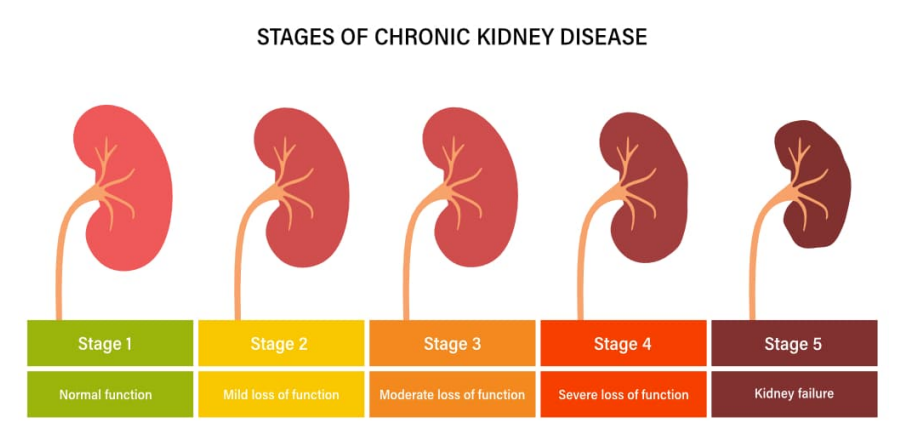

In Above picture show the stages of kidney function and failure.

#Dataset Collection:

The study begins with the collection of a Chronic Kidney Disease (CKD) dataset.
->Import the necessary libaries

In [1]:
# import necessary libraries like numpy, pandas, pyplot and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# reading dataset
chronic_df = pd.read_csv('/content/kidney_disease.csv')
chronic_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## **`Dataset Description`**
- age		-	age
- bp		-	blood pressure
- sg		-	specific gravity
- al		-   	albumin
- su		-	sugar
- rbc		-	red blood cells
- pc		-	pus cell
- pcc		-	pus cell clumps
- ba		-	bacteria
- 	bgr		-	blood glucose random
-			bu		-	blood urea
-			sc		-	serum creatinine
-			sod		-	sodium
-			pot		-	potassium
-			hemo		-	hemoglobin
-			pcv		-	packed cell volume
-			wc		-	white blood cell count
-			rc		-	red blood cell count
-			htn		-	hypertension
-			dm		-	diabetes mellitus
-			cad		-	coronary artery disease
-			appet		-	appetite
-			pe		-	pedal edema
-			ane		-	anemia
-			class		-	class
- ##################################################
%
- Number of Attributes: 24 + class = 25 ( 11  numeric ,14  nominal)
%
<h3>Attribute Information :</h3>
- 1.Age(numerical)
  	  	age in years
- 	2.Blood Pressure(numerical)
	       	bp in mm/Hg
-	3.Specific Gravity(nominal)
	  	sg - (1.005,1.010,1.015,1.020,1.025)
- 	4.Albumin(nominal)
		  al - (0,1,2,3,4,5)
-	5.Sugar(nominal)
		  su - (0,1,2,3,4,5)
- 	6.Red Blood Cells(nominal)
		  rbc - (normal,abnormal)
- 	7.Pus Cell (nominal)
		  pc - (normal,abnormal)
- 	8.Pus Cell clumps(nominal)
		  pcc - (present,notpresent)
- 	9.Bacteria(nominal)
		  ba  - (present,notpresent)
- 	10.Blood Glucose Random(numerical)
		  bgr in mgs/dl
- 	11.Blood Urea(numerical)
		  bu in mgs/dl
- 	12.Serum Creatinine(numerical)
		  sc in mgs/dl
- 	13.Sodium(numerical)
		  sod in mEq/L
- 	14.Potassium(numerical)
		  pot in mEq/L
- 	15.Hemoglobin(numerical)
		  hemo in gms
- 	16.Packed  Cell Volume(numerical)
- 	17.White Blood Cell Count(numerical)
		  wc in cells/cumm
- 	18.Red Blood Cell Count(numerical)
		  rc in millions/cmm
- 	19.Hypertension(nominal)
		  htn - (yes,no)
- 	20.Diabetes Mellitus(nominal)
		  dm - (yes,no)
- 	21.Coronary Artery Disease(nominal)
		  cad - (yes,no)
- 	22.Appetite(nominal)
	    appet - (good,poor)
- 	23.Pedal Edema(nominal)
		  pe - (yes,no)
- 	24.Anemia(nominal)
		  ane - (yes,no)
- 	25.Class (nominal)
		  class - (ckd,notckd)

In [6]:
# checking info of columns and null values

chronic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## **`Data Cleaning`**

In [7]:
# drop id column
chronic_df = chronic_df.drop('id', axis = 1)



In [8]:
# rename column names to make it more user-friendly

chronic_df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [9]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


#Data Preprocessing:

The dataset undergoes a series of preprocessing steps:

Cleaning and Conversion: Data is cleaned and converted into a suitable format for analysis.

Handling Missing Values: Any null values in the dataset are filled.

Data Splitting: The dataset is split into training and test sets for model evaluation.

### According to the data description
- Cols(pcv, wc and rc) needs to convert back in numerical since it is object right now
- Cols(sg, al and su) should be nominal , convert from float to object

In [10]:
# Categorical cols like specific_gravity, albumin and sugar which is float type right now
# converting back to nominal data type categorical

chronic_df['specific_gravity'] = chronic_df['specific_gravity'].astype('object')
chronic_df['albumin'] = chronic_df['albumin'].astype('object')
chronic_df['sugar'] = chronic_df['sugar'].astype('object')


In [11]:
# converting necessary columns like packed_cell_volume, white-blood_cell_count and red_blood_cell_count
# currently it is in object type and converting back to numerical type

chronic_df['packed_cell_volume'] = pd.to_numeric(chronic_df['packed_cell_volume'], errors='coerce')

chronic_df['white_blood_cell_count'] = pd.to_numeric(chronic_df['white_blood_cell_count'], errors='coerce')

chronic_df['red_blood_cell_count'] = pd.to_numeric(chronic_df['red_blood_cell_count'], errors='coerce')



In [12]:
# Extracting categorical and numerical columns

cat_cols = [col for col in chronic_df.columns if chronic_df[col].dtype == 'object']
num_cols = [col for col in chronic_df.columns if chronic_df[col].dtype != 'object']


In [14]:
num_cols

['age',
 'blood_pressure',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [13]:
cat_cols

['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [15]:
# by looping & looking at unique values in categorical columns

for col in cat_cols:
    print(f'{col} : {chronic_df[col].unique()}')



specific_gravity : [1.02 1.01 1.005 1.015 nan 1.025]
albumin : [1.0 4.0 2.0 3.0 0.0 nan 5.0]
sugar : [0.0 3.0 4.0 1.0 nan 2.0 5.0]
red_blood_cells : [nan 'normal' 'abnormal']
pus_cell : ['normal' 'abnormal' nan]
pus_cell_clumps : ['notpresent' 'present' nan]
bacteria : ['notpresent' 'present' nan]
hypertension : ['yes' 'no' nan]
diabetes_mellitus : ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease : ['no' 'yes' '\tno' nan]
appetite : ['good' 'poor' nan]
peda_edema : ['no' 'yes' nan]
aanemia : ['no' 'yes' nan]
class : ['ckd' 'ckd\t' 'notckd']


In [16]:
# replace incorrect values like '\tno', '\tyes', ' yes', '\tno', 'ckd\t', 'notckd'  in categorical cols

chronic_df["diabetes_mellitus"].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

chronic_df["coronary_artery_disease"].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

chronic_df['class'].replace(to_replace = {'ckd\t':'ckd'},inplace=True)



In [17]:
# Converting target col class into 0(chronic kidney) and 1(not a chronic kidney)


chronic_df['class'].replace(to_replace = {'ckd':0,'notckd':1},inplace=True)

# coverting target col into numeric to check correlation


chronic_df['class'] = pd.to_numeric(chronic_df['class'], errors='coerce')

In [18]:
# let's see the cols in numerical col list

num_cols

['age',
 'blood_pressure',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

## **`EDA`**

<Figure size 2000x1200 with 0 Axes>

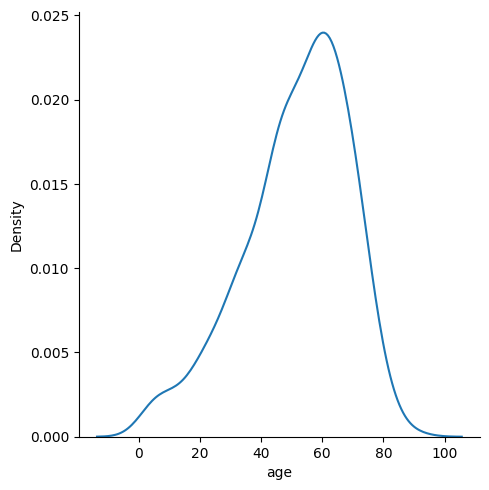

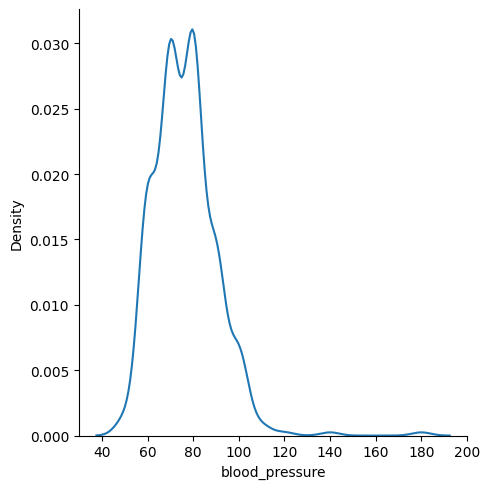

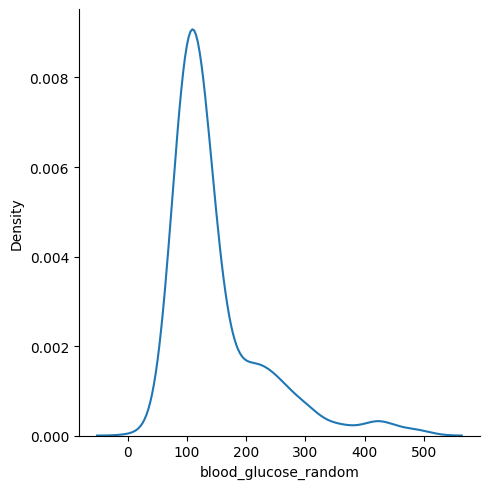

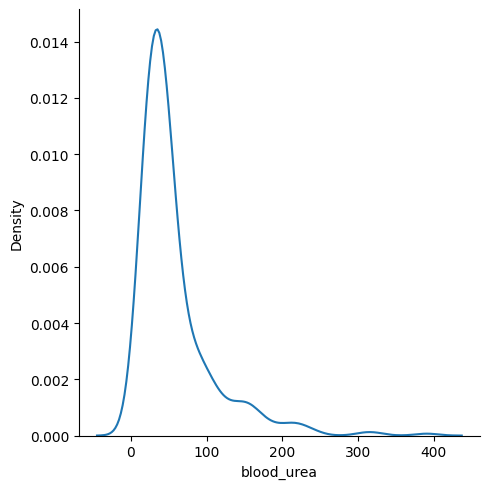

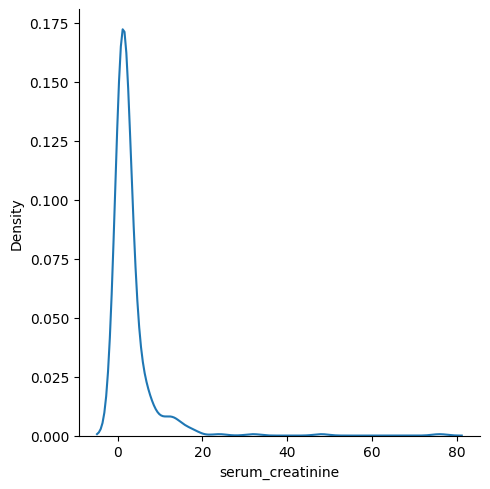

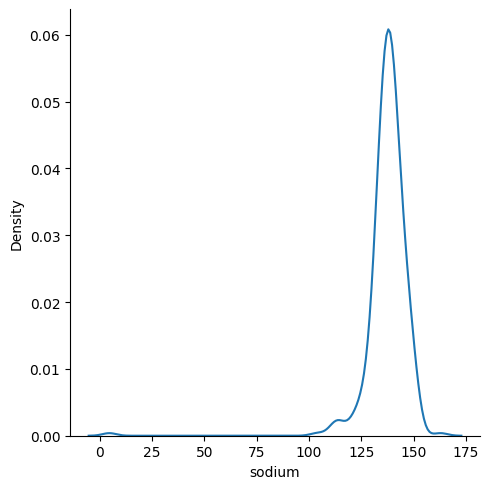

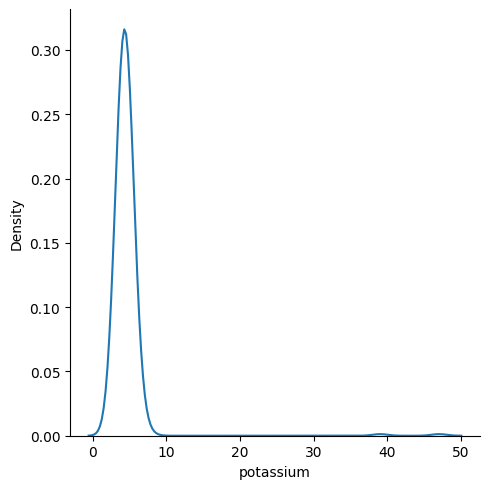

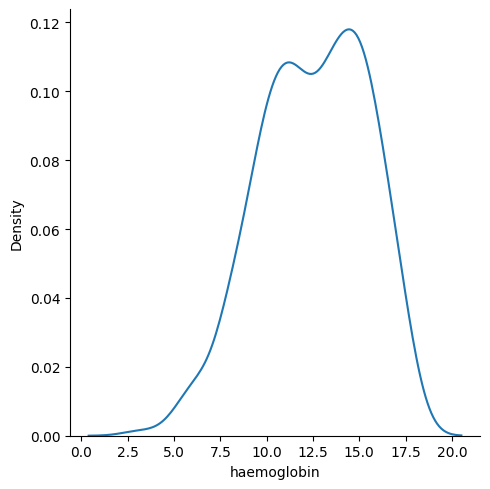

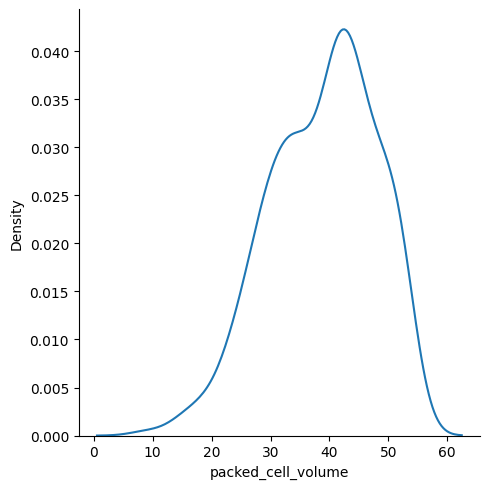

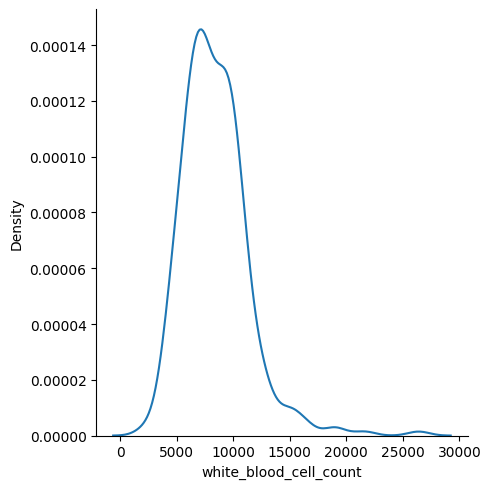

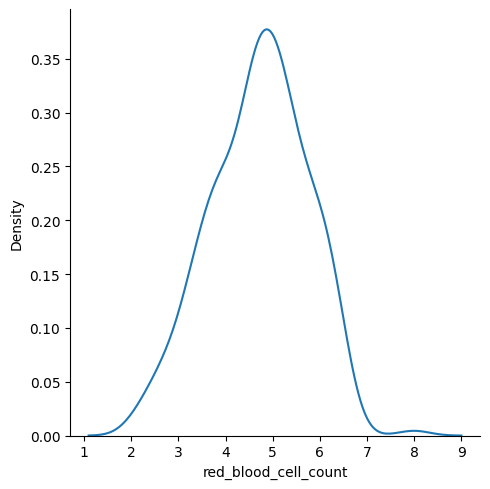

In [20]:
# checking numerical features distribution


plt.figure(figsize=(20,12))

# looping over num cols and checking its distribution


for col in num_cols:
  sns.displot(chronic_df[col],kind="kde")
  plt.show()


In [21]:
# let's see the cols in cat col list


cat_cols

['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

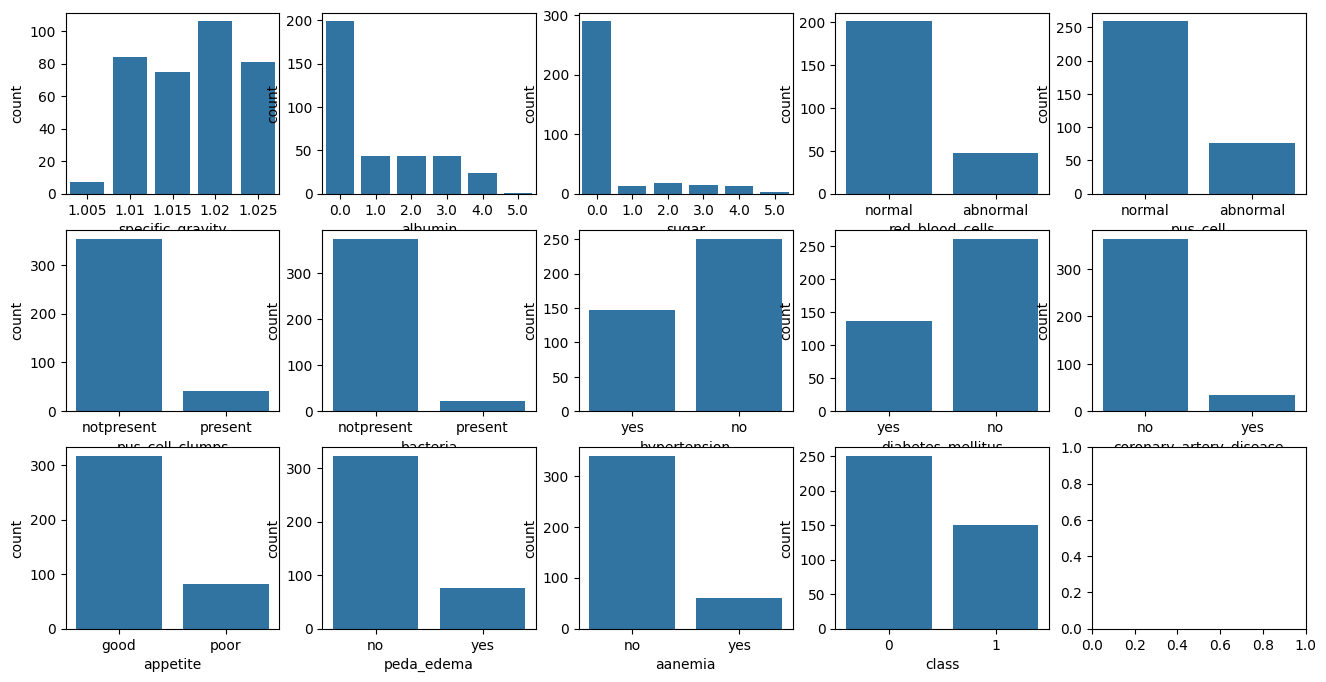

In [22]:
# checking cat features distribution

# create the figure and axes

fig, axes = plt.subplots(3, 5, figsize=(16,8))


axes = axes.ravel()  # flattening the array makes indexing easier

# loop over cat cols and plot countplot


for col, ax in zip(cat_cols, axes):
    sns.countplot(data=chronic_df, x=col, ax=ax)





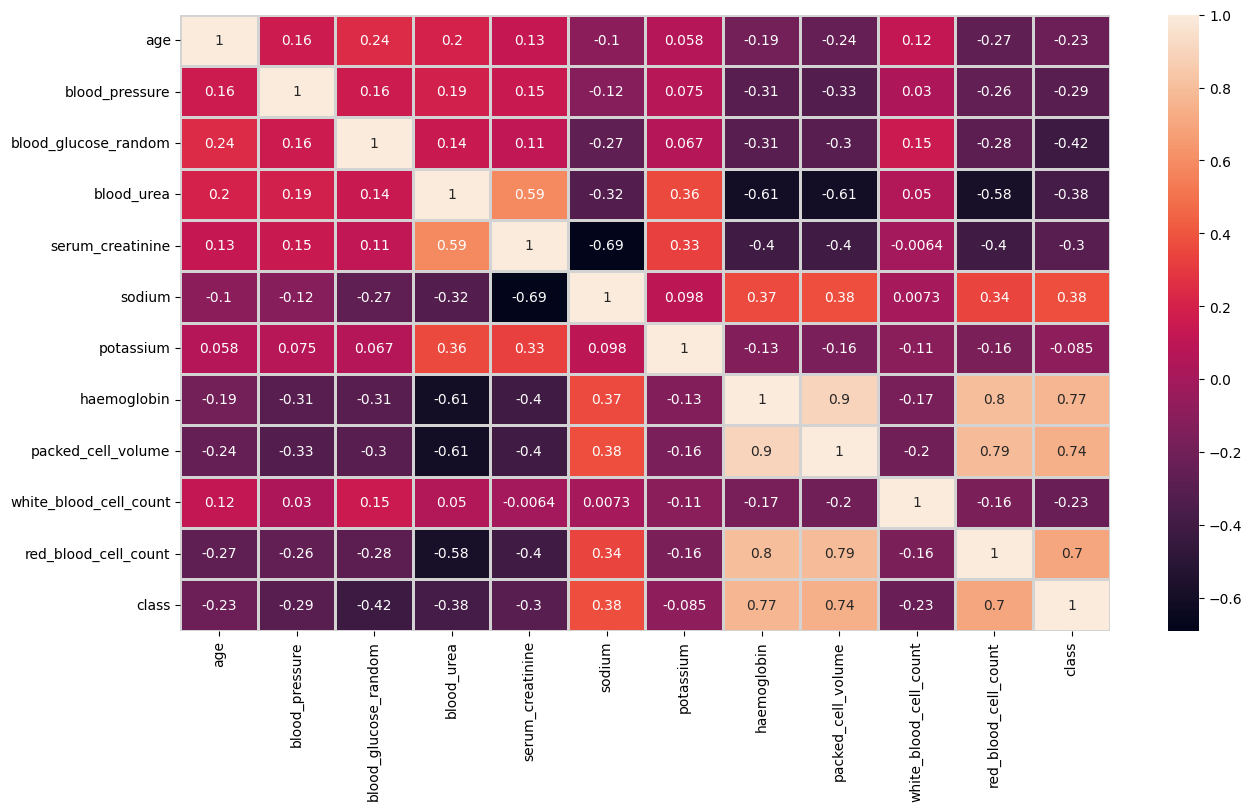

In [25]:
# correlated heatmap of data

# Select only numerical columns
numerical_df = chronic_df.select_dtypes(include=['number'])

plt.figure(figsize = (15, 8))
sns.heatmap(numerical_df.corr(), annot = True, linewidths=2, linecolor="lightgrey")
plt.show()

In [27]:
# let's check count of null values in whole df
chronic_df.isnull().sum().sort_values(ascending = False)




,0
red_blood_cells,152
red_blood_cell_count,131
white_blood_cell_count,106
potassium,88
sodium,87
packed_cell_volume,71
pus_cell,65
haemoglobin,52
sugar,49
specific_gravity,47


In [29]:
# let's check count of null values in num_cols


chronic_df[num_cols].isnull().sum().sort_values(ascending = False)

,0
red_blood_cell_count,131
white_blood_cell_count,106
potassium,88
sodium,87
packed_cell_volume,71
haemoglobin,52
blood_glucose_random,44
blood_urea,19
serum_creatinine,17
blood_pressure,12


In [30]:
# let's check count of null values in cat cols



chronic_df[cat_cols].isnull().sum().sort_values(ascending = False)

,0
red_blood_cells,152
pus_cell,65
sugar,49
specific_gravity,47
albumin,46
pus_cell_clumps,4
bacteria,4
hypertension,2
diabetes_mellitus,2
coronary_artery_disease,2


## **`Missing Value Treatment`**

In [31]:
# filling null values, we will use two methods, random sampling for higher null values and
# mean/mode sampling for lower null values

# creating func for imputing random values
def random_value_imputation(feature):
    random_sample = chronic_df[feature].dropna().sample(chronic_df[feature].isnull().sum())
    random_sample.index = chronic_df[chronic_df[feature].isnull()].index
    chronic_df.loc[chronic_df[feature].isnull(), feature] = random_sample

# creating func for imputing most common value(modal value)
def impute_mode(feature):
    mode = chronic_df[feature].mode()[0]
    chronic_df[feature] = chronic_df[feature].fillna(mode)

In [32]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)



In [33]:
# let's check count of null values in num_cols again


chronic_df[num_cols].isnull().sum().sort_values(ascending = False)


,0
age,0
blood_pressure,0
blood_glucose_random,0
blood_urea,0
serum_creatinine,0
sodium,0
potassium,0
haemoglobin,0
packed_cell_volume,0
white_blood_cell_count,0


In [34]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation("red_blood_cells")
random_value_imputation("pus_cell")







In [35]:

for col in cat_cols:
    impute_mode(col)

In [36]:
# let's check count of null values in cat_cols again
chronic_df[cat_cols].isnull().sum().sort_values(ascending = False)

,0
specific_gravity,0
albumin,0
sugar,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0
hypertension,0
diabetes_mellitus,0
coronary_artery_disease,0


In [39]:
# check unique values in each cat col by looping over cat cols


for col in cat_cols:
    print(f'{col} : {chronic_df[col].nunique()} categories')




specific_gravity : 5 categories
albumin : 6 categories
sugar : 6 categories
red_blood_cells : 2 categories
pus_cell : 2 categories
pus_cell_clumps : 2 categories
bacteria : 2 categories
hypertension : 2 categories
diabetes_mellitus : 2 categories
coronary_artery_disease : 2 categories
appetite : 2 categories
peda_edema : 2 categories
aanemia : 2 categories
class : 2 categories


In [40]:
# using labelencoder and applying on cat cols
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols[3:]:
    chronic_df[col] =le.fit_transform(chronic_df[col])

In [41]:
# check chronic df after transforming cat cols

chronic_df.head()



,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,131.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.0,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


#Classifier Selection:

Multiple machine learning classifiers are implemented, including:

Ensemble Methods: Ada Boost, XGBoost, Cat Boost, Gradient Boosting (GB), and Stochastic Gradient Boosting (SGB).

Tree-Based Models: Decision Tree (DT), Extra Trees (ET), Random Forest (RF).

Other Classifiers: Naive Bayes (NB), K-Nearest Neighbors (KNN), Support Vector Machine (SVM), LightGBM (LGBM), Artificial Neural Networks (ANN), and Hybrid models.

In [42]:
# Split data into features and target variables (X and y)
X = chronic_df.drop('class', axis = 1)
y = chronic_df['class']




In [43]:
# splitting data intp training and test set, so import train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)





## **`Model Building`**

#Model Building and Evaluation:

The models are evaluated using various metrics:

Accuracy and Precision: To measure overall performance and correctness.

Confusion Matrix: To assess the performance in detail.

Recall and F1 Score: To evaluate the model’s ability to identify CKD cases.

Support: To consider the number of true instances in each class.

In [44]:
# import KNeighborsClassifier, accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)





# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy Score: {accuracy_score(y_train, knn.predict(X_train))}")


print(f'Accuracy Score: {knn_acc}')

print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')

print(f'Classification Report: \n{classification_report(y_test, y_pred)}')









Training Accuracy Score: 0.7642857142857142
Accuracy Score: 0.7083333333333334
Confusion Matrix: 
[[50 22]
 [13 35]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.69      0.74        72
           1       0.61      0.73      0.67        48

    accuracy                           0.71       120
   macro avg       0.70      0.71      0.70       120
weighted avg       0.72      0.71      0.71       120



In [45]:
# import DecisionTreeClassifer
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)


# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy Score: {accuracy_score(y_train, dtc.predict(X_train))}")


print(f'Accuracy Score: {dtc_acc}')

print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')

print(f'Classification Report: \n{classification_report(y_test, y_pred)}')




Training Accuracy Score: 1.0
Accuracy Score: 0.9833333333333333
Confusion Matrix: 
[[71  1]
 [ 1 47]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [46]:
# hyper parameter tuning of decision tree , import GridSearchCV

from sklearn.model_selection import GridSearchCV

"""
Use this param
 {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

"""

grid_param ={
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}


# Apply gridsearchcv with cv = 5, n_jobs = -1, verbose = 1
grid_search_dtc = GridSearchCV(estimator = dtc, param_grid = grid_param, cv = 5, n_jobs = -1, verbose = 1)

grid_search_dtc.fit(X_train, y_train)






Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
2800 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [47]:
# print best parameters and best score in grid search dtc
print(f'Best Parameters: {grid_search_dtc.best_params_}')
print(f'Best Score: {grid_search_dtc.best_score_}')




Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Best Score: 0.9928571428571429


In [48]:
# storing best estimator

dtc = grid_search_dtc.best_estimator_
y_pred = dtc.predict(X_test)
# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy Score: {accuracy_score(y_train, dtc.predict(X_train))}")

print(f'Accuracy Score: {dtc_acc}')

print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')

print(f'Classification Report: \n{classification_report(y_test, y_pred)}')





Training Accuracy Score: 0.9928571428571429
Accuracy Score: 0.975
Confusion Matrix: 
[[71  1]
 [ 2 46]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.96      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [50]:
# import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

# Changed 'auto' to 'sqrt' for max_features
rd_clf = RandomForestClassifier(criterion="entropy",max_depth=11,max_features="sqrt",min_samples_leaf=2,min_samples_split=3,n_estimators=130)

rd_clf.fit(X_train, y_train)

y_pred = rd_clf.predict(X_test)


# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy Score: {accuracy_score(y_train, rd_clf.predict(X_train))}")

print(f'Accuracy Score: {rd_clf_acc}')

print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')

print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Training Accuracy Score: 1.0
Accuracy Score: 0.9833333333333333
Confusion Matrix: 
[[71  1]
 [ 1 47]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [51]:


# import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
# accuracy score, confusion matrix and classification report of ada boost
ada_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy Score: {accuracy_score(y_train, ada.predict(X_train))}")

print(f'Accuracy Score: {ada_acc}')

print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')

print(f'Classification Report: \n{classification_report(y_test, y_pred)}')


Training Accuracy Score: 1.0
Accuracy Score: 0.9916666666666667
Confusion Matrix: 
[[71  1]
 [ 0 48]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [52]:

# import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
# accuracy score, confusion matrix and classification report of gradient boosting classifier
gb_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy Score: {accuracy_score(y_train, gb.predict(X_train))}")

print(f'Accuracy Score: {gb_acc}')

print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')

print(f'Classification Report: \n{classification_report(y_test, y_pred)}')


Training Accuracy Score: 1.0
Accuracy Score: 0.9916666666666667
Confusion Matrix: 
[[72  0]
 [ 1 47]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [54]:


# import XGBClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
# accuracy score, confusion matrix and classification report of xgboost
xgb_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy Score: {accuracy_score(y_train, xgb.predict(X_train))}")

print(f'Accuracy Score: {xgb_acc}')

print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')

print(f'Classification Report: \n{classification_report(y_test, y_pred)}')


Training Accuracy Score: 1.0
Accuracy Score: 0.9833333333333333
Confusion Matrix: 
[[71  1]
 [ 1 47]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [56]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.4 MB/s eta 0:00:00


In [57]:


# import CatBoostClassifier
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)
# accuracy score, confusion matrix and classification report of cat boost
cat_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy Score: {accuracy_score(y_train, cat.predict(X_train))}")

print(f'Accuracy Score: {cat_acc}')

print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')

print(f'Classification Report: \n{classification_report(y_test, y_pred)}')


Learning rate set to 0.408198
0:	learn: 0.2693481	total: 52.3ms	remaining: 471ms
1:	learn: 0.1560680	total: 55.1ms	remaining: 220ms
2:	learn: 0.0844050	total: 57.8ms	remaining: 135ms
3:	learn: 0.0604827	total: 60ms	remaining: 90ms
4:	learn: 0.0453853	total: 64ms	remaining: 64ms
5:	learn: 0.0347128	total: 71.7ms	remaining: 47.8ms
6:	learn: 0.0265378	total: 73.6ms	remaining: 31.5ms
7:	learn: 0.0204219	total: 79.9ms	remaining: 20ms
8:	learn: 0.0172665	total: 84.4ms	remaining: 9.38ms
9:	learn: 0.0143275	total: 90.7ms	remaining: 0us
Training Accuracy Score: 1.0
Accuracy Score: 0.975
Confusion Matrix: 
[[70  2]
 [ 1 47]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.96      0.98      0.97        48

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



In [58]:


# import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
# accuracy score, confusion matrix and classification report of extra trees classifier
etc_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy Score: {accuracy_score(y_train, etc.predict(X_train))}")

print(f'Accuracy Score: {etc_acc}')

print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')

print(f'Classification Report: \n{classification_report(y_test, y_pred)}')


Training Accuracy Score: 1.0
Accuracy Score: 1.0
Confusion Matrix: 
[[72  0]
 [ 0 48]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [60]:


# import LGBMClassifier
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(learning_rate=1)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
# accuracy score, confusion matrix and classification report of lgbm classifier
lgbm_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy Score: {accuracy_score(y_train, lgbm.predict(X_train))}")

print(f'Accuracy Score: {lgbm_acc}')

print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')

print(f'Classification Report: \n{classification_report(y_test, y_pred)}')


[LightGBM] [Info] Number of positive: 102, number of negative: 178
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 512
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364286 -> initscore=-0.556811
[LightGBM] [Info] Start training from score -0.556811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [61]:
# comparing all models accuracy by creating a df
models = pd.DataFrame({"Model":['KNN',"Decision Tree Classifier","Ada Boost Classifier","Gradient Boosting Classifier	",
                                "Stochastic Gradient Boosting","XgBoost","Cat Boost","Extra Trees Classifier"],"Score":[knn_acc,dtc_acc,ada_acc,gb_acc,xgb_acc,cat_acc,etc_acc,lgbm_acc]})
models.sort_values(by = "Score",ascending = False)










,Model,Score
6,Cat Boost,1.000000
2,Ada Boost Classifier,0.991667
3,Gradient Boosting Classifier\t,0.991667
4,Stochastic Gradient Boosting,0.983333
7,Extra Trees Classifier,0.983333
1,Decision Tree Classifier,0.975000
5,XgBoost,0.975000
0,KNN,0.708333


#Conclusion:

This study explored various machine learning algorithms to diagnose Chronic Kidney Disease (CKD) at an early stage. By analyzing the CKD dataset, key features like hemoglobin, albumin, and specific gravity were identified as critical predictors. The dataset was preprocessed, and PCA was applied to focus on the most significant features. The models were then trained and validated, with accuracy being the main performance metric. Among the algorithms, Cat Boost achieved the highest accuracy, followed by Ada Boost and Gradient Boosting, highlighting their effectiveness in early CKD detection.

Here the model and Accuracy Scores:

**Highly Accurate Models**: The Cat Boost model achieved a perfect score of 1.000, indicating its exceptional ability to accurately predict CKD in the dataset used.

**Strong Performance of Ensemble Methods**: Ensemble methods like Ada Boost, Gradient Boosting, and Stochastic Gradient Boosting also demonstrated high accuracy, with scores ranging from 0.991667 to 0.983333, making them reliable choices for CKD prediction.

**Importance of Feature Selection**: The application of PCA and filter feature selection approaches helped in identifying key attributes like hemoglobin, albumin, and specific gravity, which were crucial for accurate CKD prediction.

**Moderate Performance of Decision Tree and XGBoost**: While Decision Tree Classifier and XGBoost had slightly lower accuracy scores (0.975000), they still performed well, though not as effectively as the top-performing models.

**Underperformance of KNN:** The K-Nearest Neighbors (KNN) algorithm had a significantly lower accuracy score of 0.708333, indicating that it may not be as suitable for CKD prediction in this context.